# 2D Generalized Relu Scoop Networks

In [2]:
from neuralnetwork import Network
from neuralnetwork.datasets import blobs, circle
from neuralnetwork.activations import absolute, relu, sigmoid

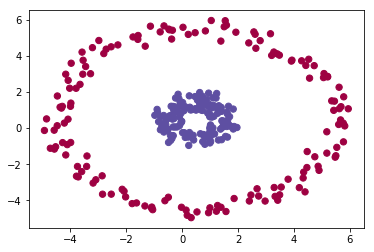

In [3]:
X_train, Y_train= circle.load_data()
circle.graph(X_train,Y_train)

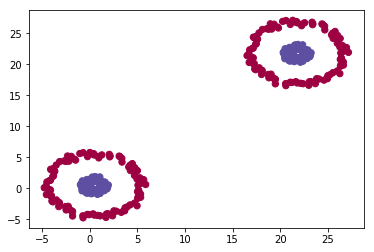

In [4]:
X_train, Y_train = circle.load_data_multiple_circles()
circle.graph(X_train,Y_train)

Layer: L0, Neurons: 2
Layer: L1, Neurons: 4, Weights: (4, 2), Biases: (4, 1)
Layer: L2, Neurons: 1, Weights: (1, 4), Biases: (1, 1)


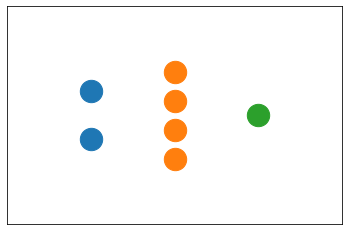

In [5]:
mynetwork = Network(2)
mynetwork.add_layer(number_of_neurons = 4 , activation=relu)
mynetwork.add_layer(number_of_neurons = 1, activation=sigmoid)
mynetwork.summary()

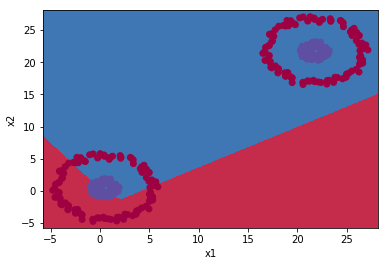

In [6]:
blobs.plot_decision_boundary(X_train, Y_train, mynetwork.predict)

In [7]:
from neuralnetwork.optimizers import adam

In [19]:
num_epochs = 1000
batch_size = 64
learning_rate=0.001
num_repetitions = 5
# Adam
for i in range(num_repetitions):
    mynetwork.fit(X_train, Y_train, batch_size=batch_size, num_epochs=num_epochs, learning_rate=learning_rate, optimizer = adam, beta = 0.9)

Loss:0.222357 Acc:0.925000: 100%|██████████| 1000/1000 [00:00<00:00, 1206.55it/s]


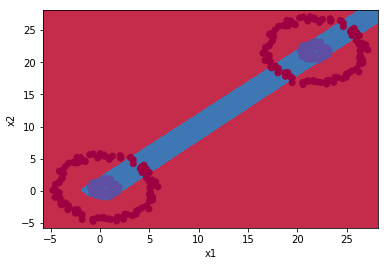

In [20]:
blobs.plot_decision_boundary(X_train, Y_train, mynetwork.predict)

# Create Relu Scoop

In [12]:
import numpy as np

In [13]:
# Set 'center' to (0,0)
mynetwork.layers['L1']['biases'] = np.zeros_like(mynetwork.layers['L1']['biases'])
mynetwork.layers['L1']['biases']

array([[0.],
       [0.],
       [0.],
       [0.]])

In [14]:
# Set the slopes
mynetwork.layers['L1']['weights'] = np.array([[1.0,1.0],[-1.0,-1.0],[1.0,-1.0],[-1.0,1.0]])
mynetwork.layers['L1']['weights']

array([[ 1.,  1.],
       [-1., -1.],
       [ 1., -1.],
       [-1.,  1.]])

In [15]:
mynetwork.layers['L2']['weights'] = -np.ones_like(mynetwork.layers['L2']['weights'])
mynetwork.layers['L2']['weights']

array([[-1., -1., -1., -1.]])

In [16]:
mynetwork.layers['L2']['biases'] =  np.zeros_like(mynetwork.layers['L2']['biases'])+5.0
mynetwork.layers['L2']['biases'] 

array([[5.]])

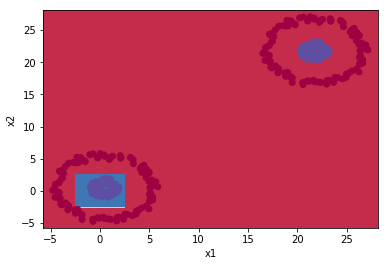

In [17]:
blobs.plot_decision_boundary(X_train, Y_train, mynetwork.predict)

In [18]:
mynetwork.accuracy(X_train,Y_train)

0.75

# Now for 2 scoops

Layer: L0, Neurons: 2
Layer: L1, Neurons: 8, Weights: (8, 2), Biases: (8, 1)
Layer: L2, Neurons: 2, Weights: (2, 8), Biases: (2, 1)
Layer: L3, Neurons: 1, Weights: (1, 2), Biases: (1, 1)


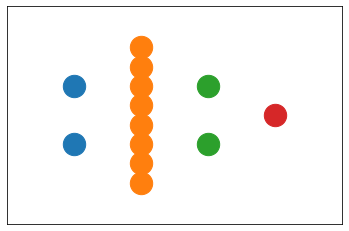

In [187]:
mynetwork = Network(2)
mynetwork.add_layer(number_of_neurons = 8 , activation=relu)
mynetwork.add_layer(number_of_neurons = 2 , activation=relu)
mynetwork.add_layer(number_of_neurons = 1, activation=sigmoid)
mynetwork.summary()

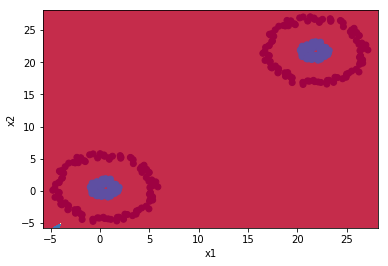

In [188]:
blobs.plot_decision_boundary(X_train, Y_train, mynetwork.predict)

In [88]:
num_epochs = 100
batch_size = 64
learning_rate=0.01
num_repetitions = 5
# Adam
for i in range(num_repetitions):
    mynetwork.fit(X_train, Y_train, batch_size=batch_size, num_epochs=num_epochs, learning_rate=learning_rate, optimizer = adam, beta = 0.9)

Loss:nan Acc:0.952500: 100%|██████████| 100/100 [00:00<00:00, 830.67it/s]


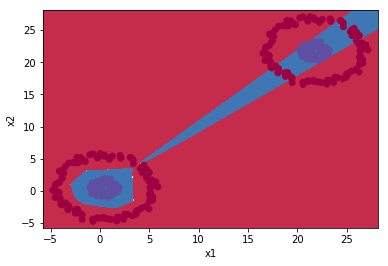

In [89]:
blobs.plot_decision_boundary(X_train, Y_train, mynetwork.predict)

# Not bad

# Let's reinitialize the points Create Relu Scoop

In [189]:
import numpy as np

In [253]:
mynetwork.layers['L1']['biases'] = np.array([[0.0,0.0,0.0,0.0,-44.0,44.0,0.0,0.0]]).T

In [254]:
mynetwork.layers['L1']['weights'] = np.array([[1.0,1.0],[-1.0,-1.0],[1.0,-1.0],[-1.0,1.0],[1.0,1.0],[-1.0,-1.0],[1.0,-1.0],[-1.0,1.0]])

In [255]:
mynetwork.layers['L2']['weights'] = -np.array([[1.0,1.0,1.0,1.0,0,0,0,0],[0,0,0,0,1.0,1.0,1.0,1.0]])

In [256]:
mynetwork.layers['L2']['biases']

array([[3.97702207],
       [3.99101252]])

In [257]:
mynetwork.layers['L2']['biases'] =  np.zeros_like(mynetwork.layers['L2']['biases']) + 4.0

In [258]:
mynetwork.layers['L3']['weights'] = np.ones_like(mynetwork.layers['L3']['weights'])

In [259]:
mynetwork.layers['L3']['biases'] = np.zeros_like(mynetwork.layers['L3']['biases'])-0.05

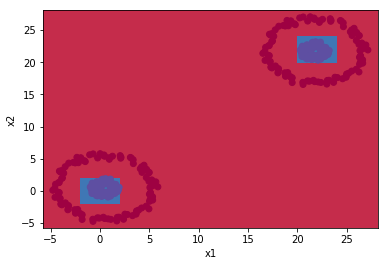

In [260]:
blobs.plot_decision_boundary(X_train, Y_train, mynetwork.predict)

In [261]:
mynetwork.accuracy(X_train,Y_train)

1.0

In [271]:
num_epochs = 100
batch_size = 64
learning_rate=0.001
num_repetitions = 5
# Adam
for i in range(num_repetitions):
    mynetwork.fit(X_train, Y_train, batch_size=batch_size, num_epochs=num_epochs, learning_rate=learning_rate, optimizer = adam, beta = 0.9)

Loss:nan Acc:1.000000: 100%|██████████| 100/100 [00:00<00:00, 819.28it/s]


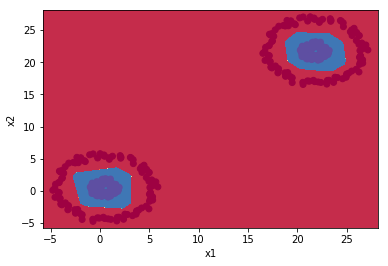

In [272]:
blobs.plot_decision_boundary(X_train, Y_train, mynetwork.predict)